<h1> Food Delivery Prediction

In [32]:
#Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [33]:
print('The number of data points',len(set(data.ID)))
print('The number of features in the data set',data.shape[1])

The number of data points 45593
The number of features in the data set 20


<h2> Data Cleaning

In [34]:
#Checking the null values
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

There are no null values. But the null values are in the string format of 'Nan'. These values can be removed using logical conditions.

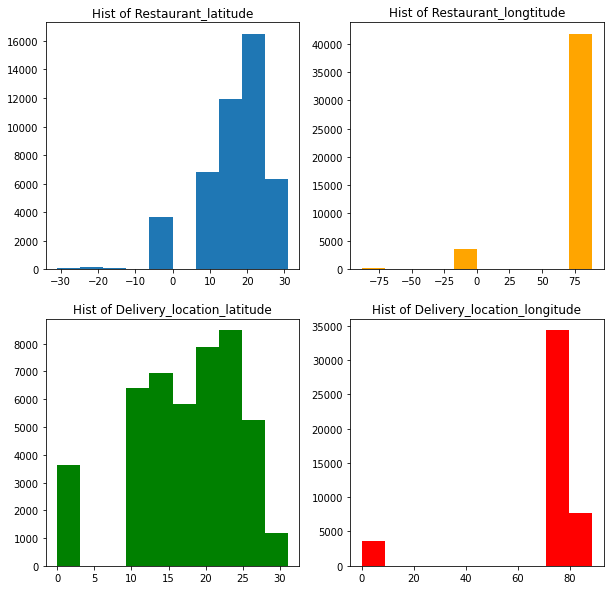

In [35]:
fig, axs = plt.subplots(2, 2, figsize = (10,10))
axs[0, 0].hist(data.Restaurant_latitude)
axs[0, 0].set_title('Hist of Restaurant_latitude')
axs[0, 1].hist(data.Restaurant_longitude, color = 'orange')
axs[0, 1].set_title('Hist of Restaurant_longtitude')
axs[1, 0].hist(data.Delivery_location_latitude, color = 'green')
axs[1, 0].set_title('Hist of Delivery_location_latitude')
axs[1, 1].hist(data.Delivery_location_longitude, color = 'red')
axs[1, 1].set_title('Hist of Delivery_location_longitude')
plt.show()

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

##### Observation : The data is related to the Indian geography. The latitude and longitude of zero is incorrect. Removing the zeros from the dataset. Latitude of negative values were wrong. These are converted to positive values.

In [61]:
# The latitude and longitude can not be zero
data = data[(data['Restaurant_latitude'] != 0.0)]
# As the latitude do not have negative values. Converting all the values to positive values
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()
print('The shape of the new data set with {0} row and {1} columns'.format(data.shape[0],data.shape[1]))

The shape of the new data set with 39820 row and 25 columns


In [37]:
#the NaN values in the Delivery person age, delivery person rating are removed
# The latitude and longitude can not be zero
data = data[(data['Delivery_person_Age'] != 'NaN ') 
            & (data['Restaurant_latitude'] != 0.0) 
            & (data['Delivery_person_Ratings'] != 'NaN ')
            & (data['Time_Orderd'] != 'NaN ')]
# As the latitude do not have negative values. Converting all the values to positive values
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()
print('The shape of the new data set with {0} row and {1} columns'.format(data.shape[0],data.shape[1]))

The shape of the new data set with 40109 row and 20 columns


##### Removing the rows where NaN are present in Delivery_person_Age, Delivery person rating and time orderd

In [38]:
data = data[(data['Delivery_person_Age'] != 'NaN ') 
            & (data['Delivery_person_Ratings'] != 'NaN ')
            & (data['Time_Orderd'] != 'NaN ')]

#### Chaning the data types of the columns

In [39]:
# Changing the data type
data.Delivery_person_Age =  data.Delivery_person_Age.astype(int)
data.Delivery_person_Ratings = data.Delivery_person_Ratings.astype(float)
data['Order_Date'] = pd.to_datetime(data['Order_Date'],infer_datetime_format=True)


In [40]:
# The time taken have min string. Split with the deliminator and drop the columns
data[['min','Time_taken']] = data['Time_taken(min)'].str.split(' ',expand=True)
data.drop(['min','Time_taken(min)'], axis =1, inplace=True)
data.Time_taken = data.Time_taken.astype(float)

Festival
NaN       204
No      39122
Yes       783
Name: ID, dtype: int64


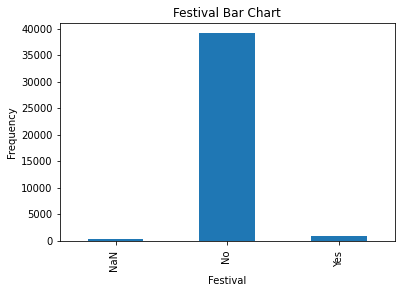

In [41]:
# Count of festivle
print(data.groupby('Festival').ID.count())
data['Festival'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Festival')
plt.ylabel('Frequency')
plt.title('Festival Bar Chart')
plt.show()

##### As the probability of festivals in India is 6.57% (considering 24 holidays 24/365). Replacing the NaN with 'No festival'

In [42]:
# The probability of festivals in India is 6.57% (24/365). Replacing the NaN with 'No'
data.Festival = data.Festival.str.replace('NaN ', 'No ')
data.groupby('Festival').ID.count()

Festival
No      39326
Yes       783
Name: ID, dtype: int64

City
Metropolitian     30030
NaN                1050
Semi-Urban          138
Urban              8891
Name: ID, dtype: int64


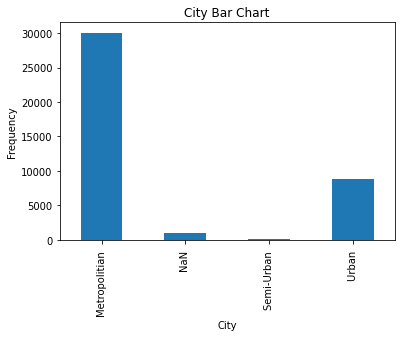

In [43]:
# Count of city type
print(data.groupby('City').ID.count())
data['City'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('City Bar Chart')
plt.show()

##### Replacing the Nan with most frequent Metropolitian

In [44]:
# Replacing the NaN city with the most frequent Metropolitian 
data.City = data.City.str.replace('NaN ', 'Metropolitian ')
data.groupby('City').ID.count()

City
Metropolitian     31080
Semi-Urban          138
Urban              8891
Name: ID, dtype: int64

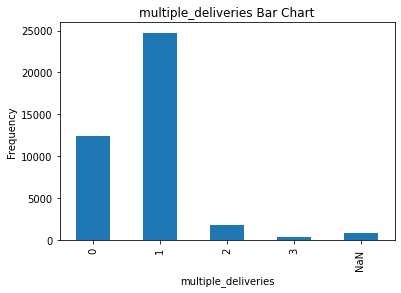

In [45]:
data.groupby('multiple_deliveries').ID.count()
data['multiple_deliveries'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('multiple_deliveries')
plt.ylabel('Frequency')
plt.title('multiple_deliveries Bar Chart')
plt.show()

In [46]:
data.multiple_deliveries = data.multiple_deliveries.astype('str')
data.multiple_deliveries = data.multiple_deliveries.str.replace('NaN ', '1')
data.groupby('multiple_deliveries').ID.count()

multiple_deliveries
0    12428
1    25600
2     1772
3      309
Name: ID, dtype: int64

Weatherconditions
Cloudy        6693
Fog           6805
Sandstorms    6676
Stormy        6773
Sunny         6524
Windy         6638
Name: ID, dtype: int64


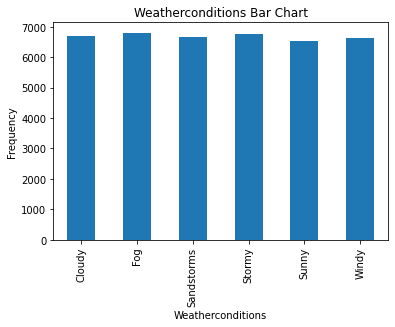

In [47]:
data.groupby('Weatherconditions').ID.count()
data.Weatherconditions = data.Weatherconditions.astype('str')
data.Weatherconditions = data.Weatherconditions.str.replace('conditions ', '')
print(data.groupby('Weatherconditions').ID.count())
data.groupby('Weatherconditions').ID.count()
data['Weatherconditions'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Weatherconditions')
plt.ylabel('Frequency')
plt.title('Weatherconditions Bar Chart')
plt.show()

<h3> Feature Engineering


<h3> 1.Distance Calculation


In [48]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))

    return R * c

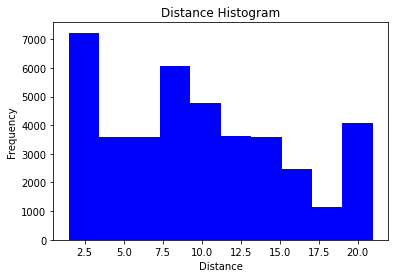

In [49]:
data['Distance'] = haversine(data['Restaurant_latitude'], data['Restaurant_longitude'],data['Delivery_location_latitude'], data['Delivery_location_longitude'])
plt.hist(data.Distance, color = 'blue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Histogram')
plt.show()

<h3> 2.Speed Calculation


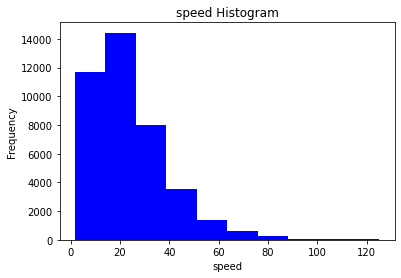

In [50]:
data['speed'] = data['Distance'] * 60.0 / data['Time_taken']
plt.hist(data.speed, color = 'blue')
plt.xlabel('speed')
plt.ylabel('Frequency')
plt.title('speed Histogram')
plt.show()

##### Driving the vehicle above 80km/hr is not realistic in the city traffic. So removing the rows which are greater than 80km\hr


In [51]:
# driving the vehicle above 80km/hr is not realistic to drive in the city traffic. So removing the rows which are greater than 80km\hr
data = data[(data['speed'] < 80)]
data.shape

(39820, 22)

<h3> 3.Order_collection_time

In [52]:
# Time lapse between order and pickup
data['Order_collection_time'] = (data['Time_Order_picked'].apply(pd.Timestamp) - data['Time_Orderd'].apply(pd.Timestamp)).astype('timedelta64[m]')
data.Order_collection_time = data.Order_collection_time.replace([-1425.0, -1435.0,-1430.0],[15,5,10])

<h3> 4.Day of the week

In [53]:
data['Day_of_order'] = data.Order_Date.dt.day_name()
data.groupby('Day_of_order').ID.count()

Day_of_order
Friday       6076
Monday       5426
Saturday     5511
Sunday       5454
Thursday     5566
Tuesday      5583
Wednesday    6204
Name: ID, dtype: int64

<h4> 5.Hour of order

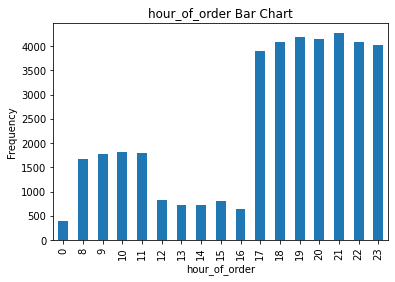

In [54]:
data['hour_of_order'] = data.Time_Orderd.apply(pd.Timestamp).dt.hour
data['hour_of_order'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('hour_of_order')
plt.ylabel('Frequency')
plt.title('hour_of_order Bar Chart')
plt.show()

<h2> Data Analysis

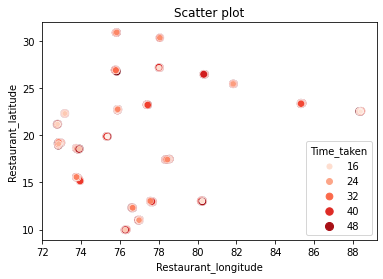

In [55]:
# create a scatter plot with a heat map
sns.scatterplot(x='Restaurant_longitude', y='Restaurant_latitude', data=data, hue='Time_taken', size = 'Time_taken', palette='Reds')
plt.title('Scatter plot')
# show the plot
plt.show()


##### Obeservation - The restaurants are geographically clustered, and there is a variation in the delivery time across these locations. Notably, there exist certain clusters of restaurants where the delivery time is comparatively lower than other clusters.

In [56]:
continuous_variables = ['Delivery_person_Age','Delivery_person_Ratings','Distance','speed','Time_taken']

categorical_variables = ['Weatherconditions', 'Road_traffic_density','Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City','Day_of_order','hour_of_order']

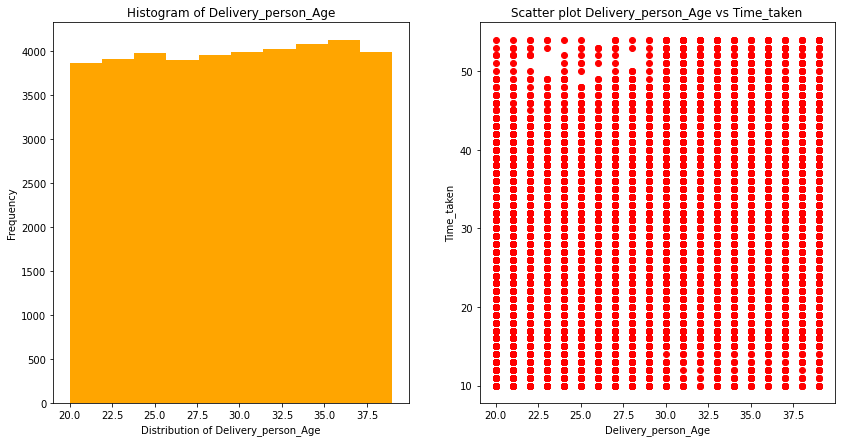

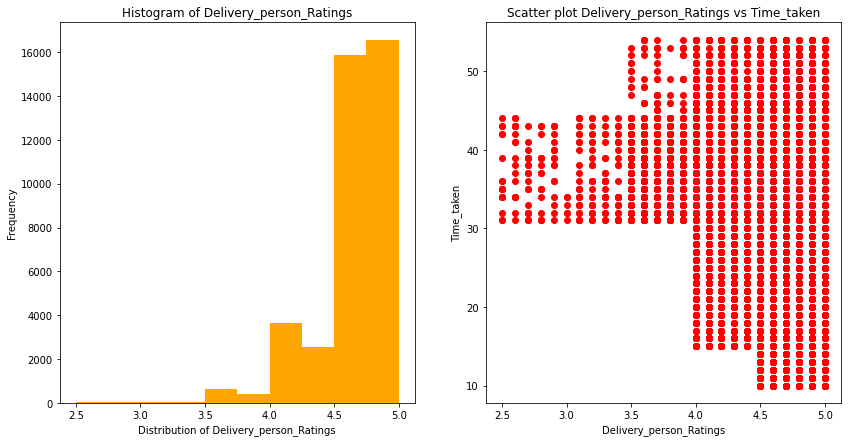

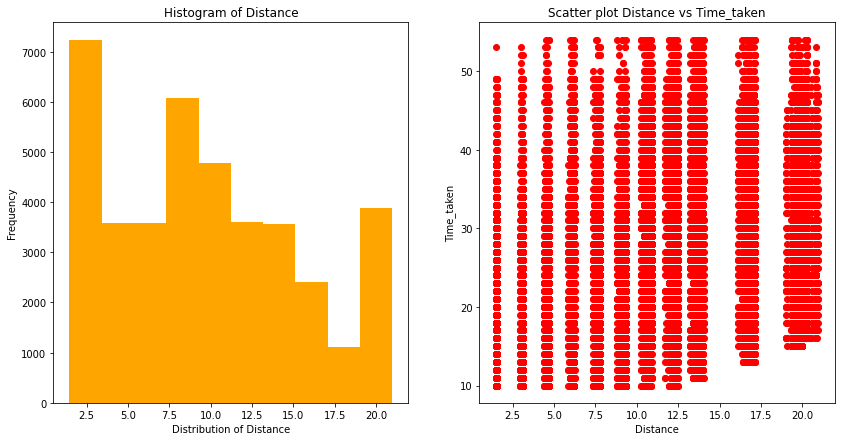

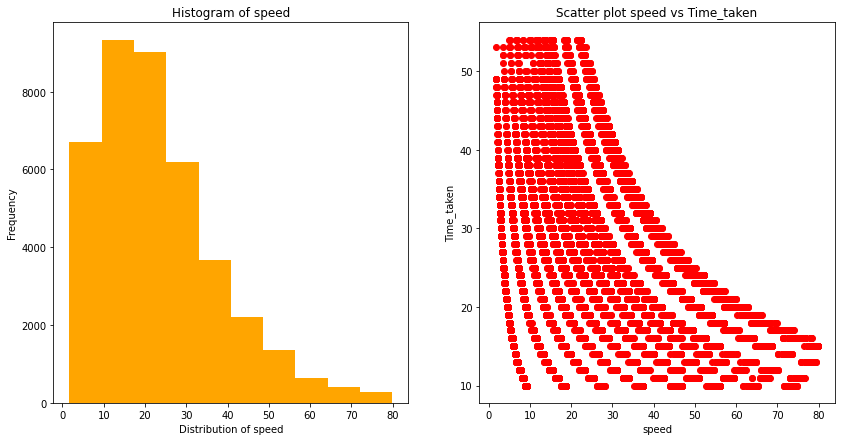

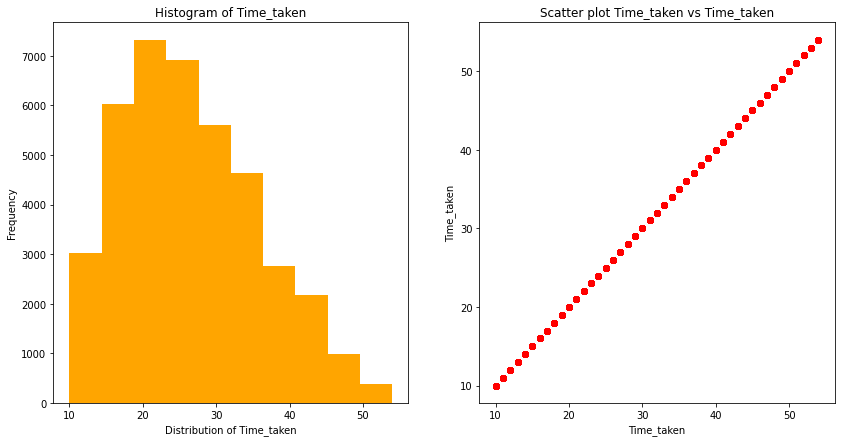

In [57]:
#Histogram of continous Variables
for i in continuous_variables:
  plt.figure(figsize=(14,7))
  plt.subplot(1, 2, 1)
  plt.hist(data[i],color = 'Orange')
  plt.xlabel('Distribution of {0}'.format(i))
  plt.ylabel('Frequency')
  plt.title("Histogram of {0}".format(i))
  plt.subplot(1, 2, 2)
  plt.scatter(x= data[i], y = data['Time_taken'], color ='red')
  plt.xlabel(i)
  plt.ylabel('Time_taken')
  plt.title('Scatter plot {0} vs Time_taken'.format(i))
  plt.show()

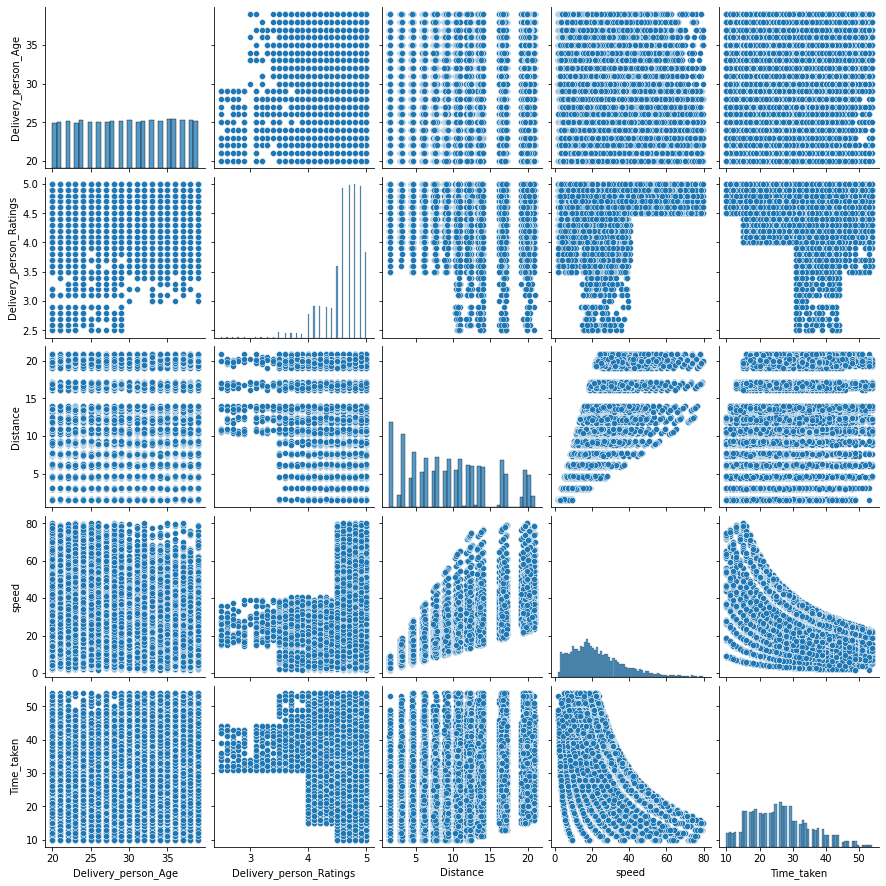

In [58]:
sns.pairplot(data[continuous_variables]) 

#####  
1.   Delivery person Age - There is an absence of notable disparity in the number of deliveries made by delivery personnel across distinct age cohorts. Additionally, the delivery time shows minimal variance across these age groups.
2.   Rating - Delivery personnel who received lower ratings were observed to take comparatively longer durations.
3.   Distance - The delivery time is more for longer distance orders

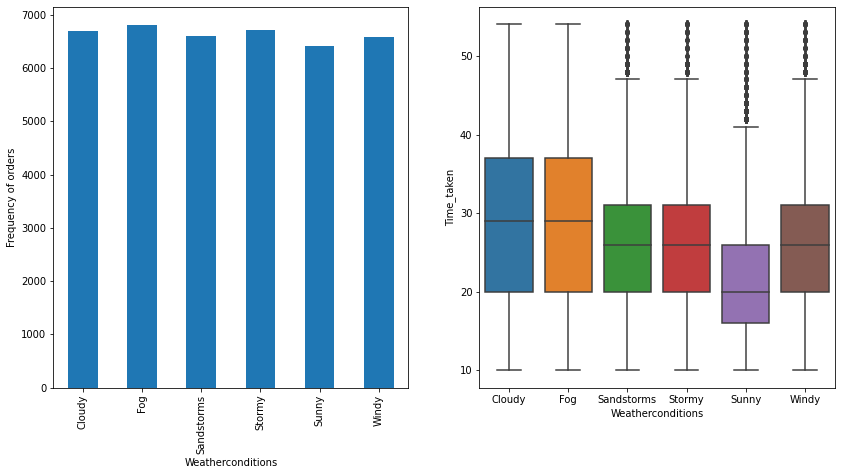

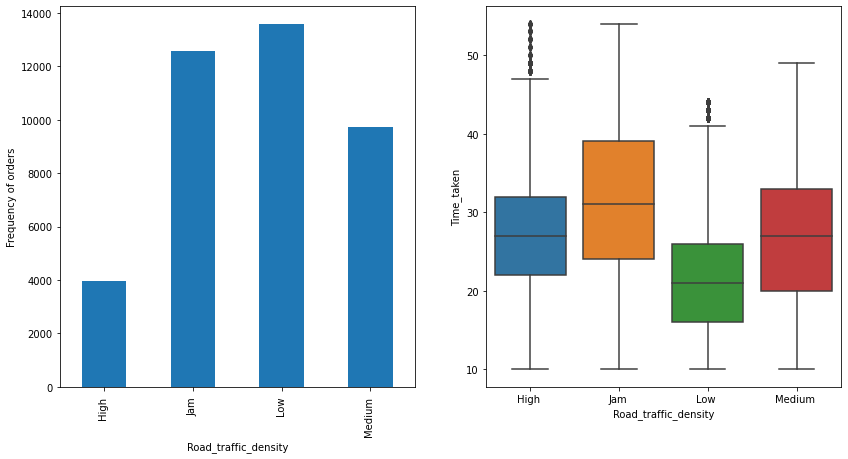

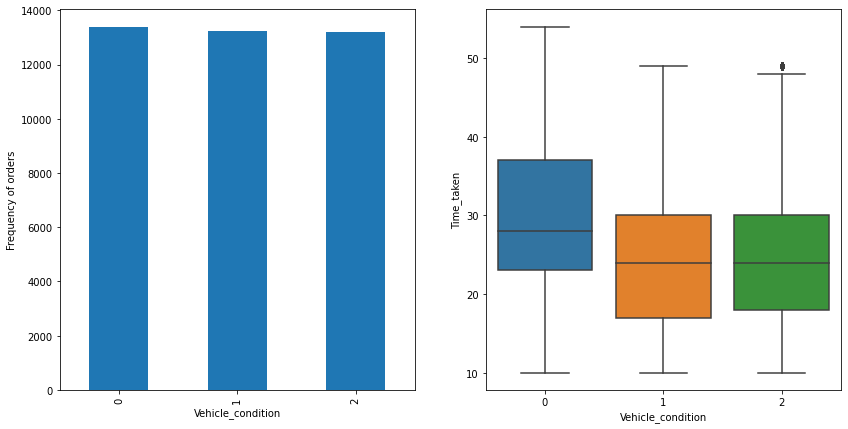

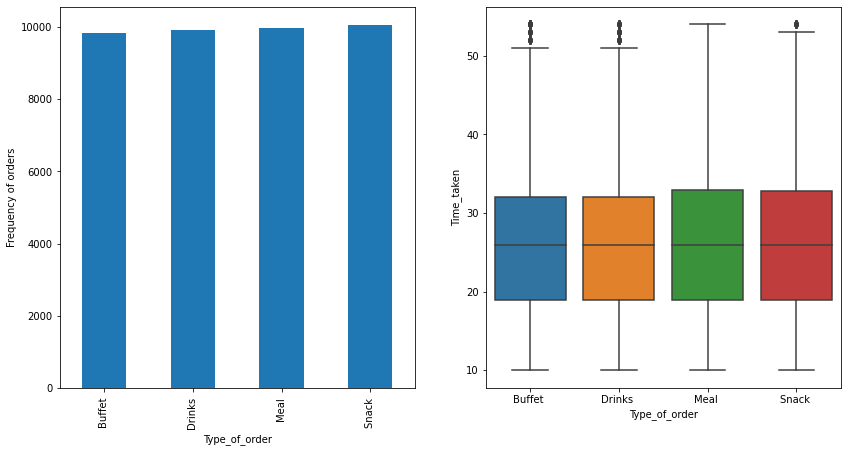

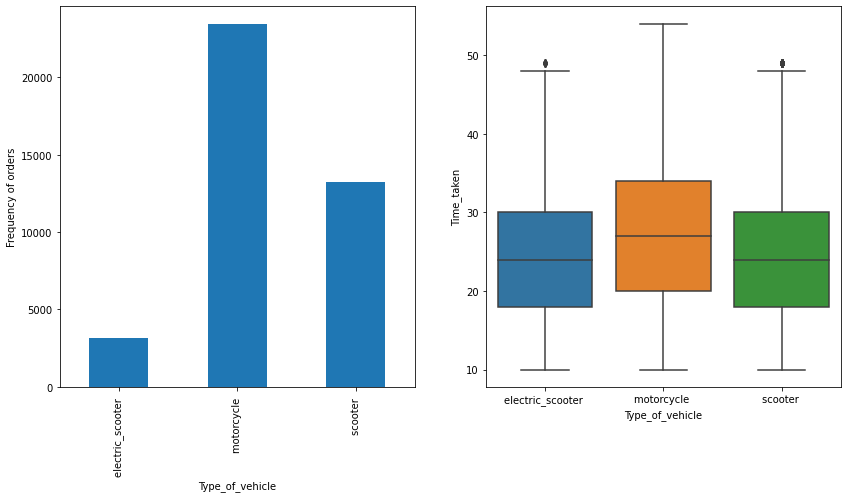

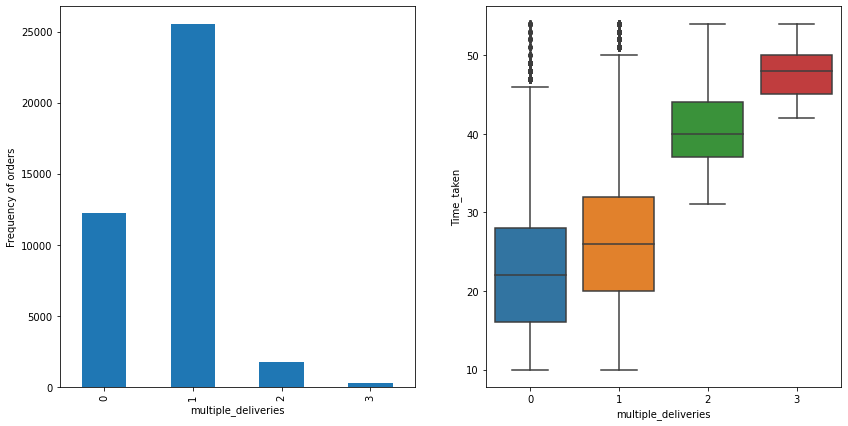

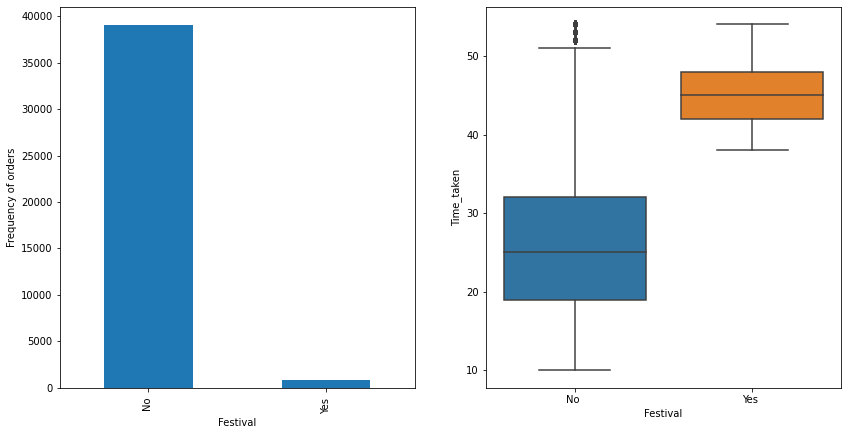

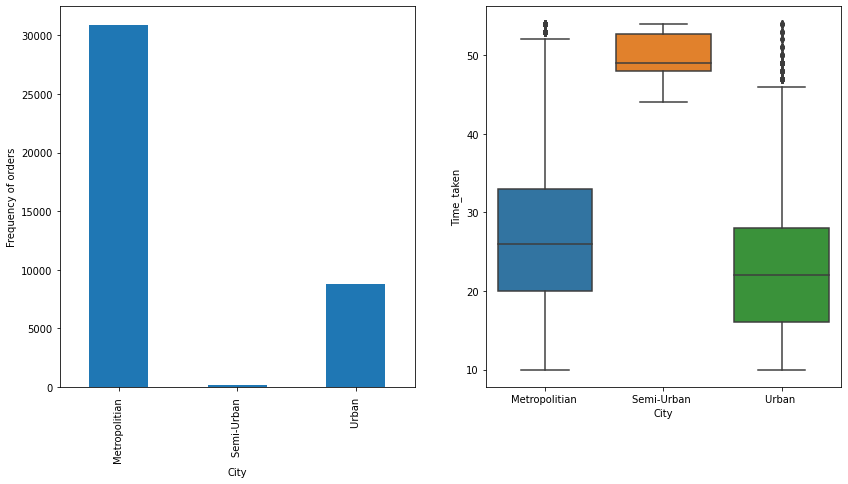

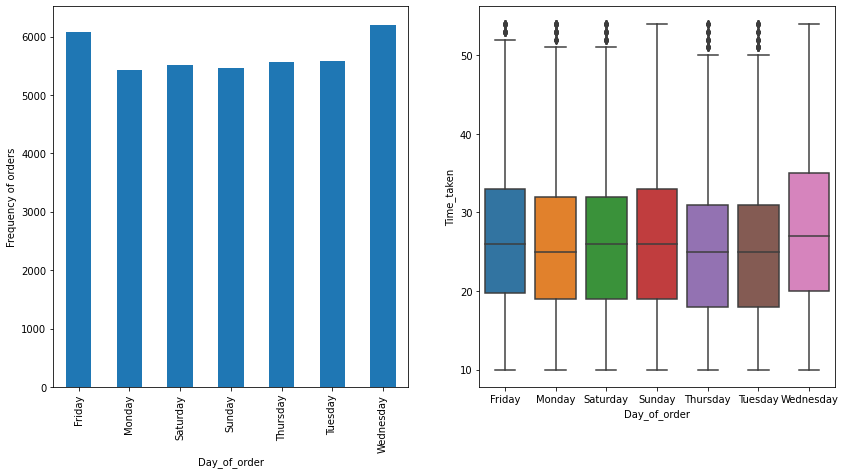

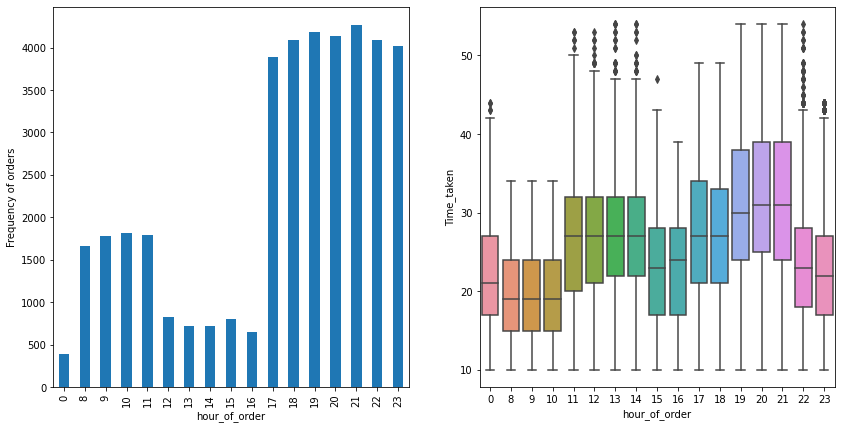

In [59]:
for i in categorical_variables:
  plt.figure(figsize=(14,7))
  plt.subplot(1, 2, 1)
  data[i].value_counts().sort_index().plot(kind='bar')
  plt.xlabel(i)
  plt.ylabel('Frequency of orders')
  plt.subplot(1, 2, 2)
  sns.boxplot(data = data , x = i , y = 'Time_taken', order = np.sort(data[i].unique()))
  plt.show()

##### Observations

1.   hour of order - Even with less orders during mid night and afternoon, the delivery time is more. During peak hours of evening and night, the delivery time is more. This is because of less availablity of delivery agents
2.   Day of order - All days of the week have frequent orders. And the distribution time to delivery is similar
3.   City - More number of orders in the metropolitian city and less from semi urban. But the delivery time is more for semi urban city compared to urban and metropolitian
4.   Festival - Festival days have less delivery and took more time to deliver
5. Multiple deliveries - More delivery more time it took to delivery the order
6. Type of Vehicle - The more frequent used mode of delivery is through the motor cycle. The ditribution of the motor cycle is much different from the rest.
7. Type of Order - No difference in delivery time for different order type
8. Vehcile condition - Vehichle with 0 category condition took more time for the delivery
9. Traffic condition - Low traffic have less delivery time. 
10. Weather Condition - Sunnay days have easy and less delivery time compared to other days



<Axes: >

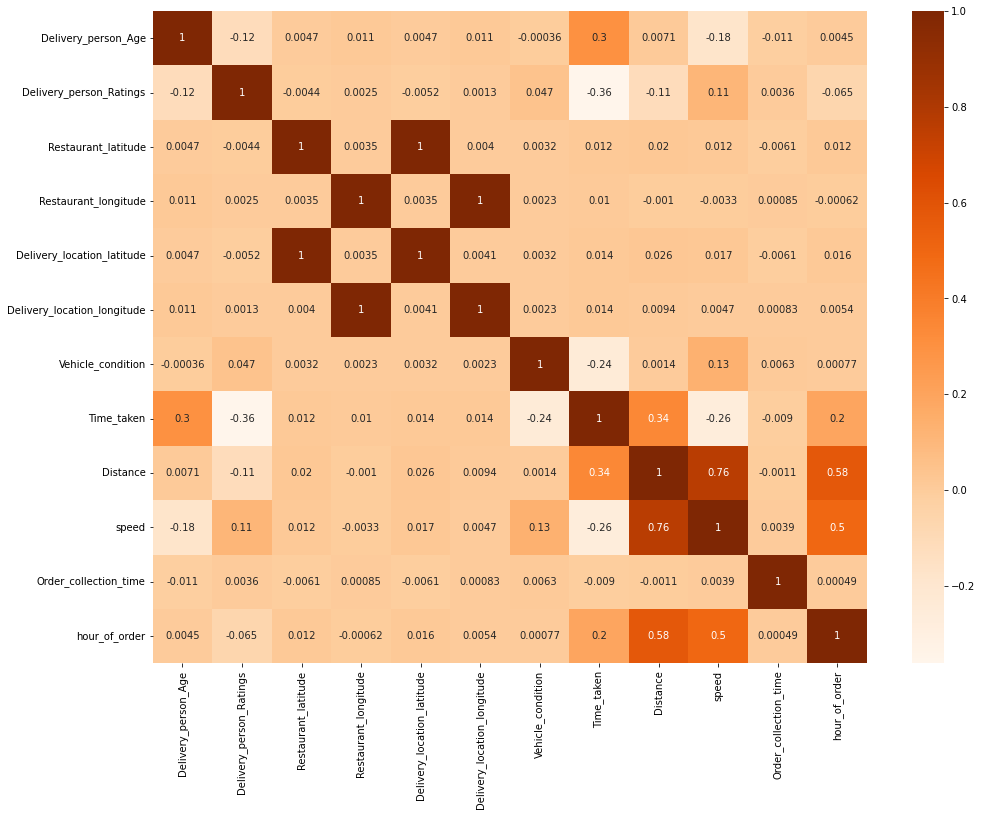

In [60]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data.corr(), cmap='Oranges', annot = True)

##### Observations - Time taken to deliver the order have positive correlation with the distance, deliver person age and negative correlation with the delivery person age.



##### Conslusion - Out of the 25 original and derived features following features contibute to the predicting the delivery time.
1. Delivery_person_Age
2. Delivery_person_Ratings
3. Clusters of resturant (Restaurant_latitude,Restaurant_longitude)
4. Weatherconditions
5. Road_traffic_density
6. Vehicle_condition
7. Type_of_vehicle
8. multiple_deliveries
9. Festival
10. City
11. Distance
12. speed
13. hour_of_order
 
Can be considered for the predicting the delivery time. 